<a href="https://colab.research.google.com/github/cmrondon2000/Tormentas_Vendavales/blob/main/Vientos2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Script: descarga ERA5 10m_wind_gust y an√°lisis de vendavales
# Requisitos: pip install cdsapi xarray netCDF4 pandas

import cdsapi
import xarray as xr
import pandas as pd
import numpy as np

# --- Par√°metros (ajusta seg√∫n prefieras) ---
LAT_MIN = 10.5
LAT_MAX = 12.8
LON_MIN = -75.0
LON_MAX = -72.0
START_YEAR = 2000
END_YEAR = 2024
OUTPUT_FILE = "era5_gusts_region.nc"

# Umbral de vendaval: 25 nudos = 46 km/h -> en m/s
THRESHOLD_MS = 46/3.6

c = cdsapi.Client()

years = [str(y) for y in range(START_YEAR, END_YEAR+1)]
months = [f"{m:02d}" for m in range(1,13)]
days = [f"{d:02d}" for d in range(1,32)]
times = [f"{h:02d}:00" for h in range(0,24)]

request = {
    "product_type":"reanalysis",
    "format":"netcdf",
    "variable":["10m_wind_gust"],
    "year": years,
    "month": months,
    "day": days,
    "time": times,
    "area":[LAT_MAX, LON_MIN, LAT_MIN, LON_MAX],
}

c.retrieve("reanalysis-era5-single-levels", request, OUTPUT_FILE)

# --- Post-proceso ---
ds = xr.open_dataset(OUTPUT_FILE)
# Seleccionar caja y calcular m√°xima diaria espacial
ds_reg = ds.sel(latitude=slice(LAT_MAX, LAT_MIN), longitude=slice(LON_MIN, LON_MAX))
ds_daily = ds_reg['10m_wind_gust'].resample(time='1D').max(dim='time')
daily_max = ds_daily.max(dim=['latitude','longitude']).to_series()
daily_max.index = pd.to_datetime(daily_max.index)

df = pd.DataFrame({'date': daily_max.index, 'gust_m_s': daily_max.values})
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['is_vendaval'] = df['gust_m_s'] >= THRESHOLD_MS

# Res√∫menes
summary_year = df.groupby('year')['is_vendaval'].sum().reset_index().rename(columns={'is_vendaval':'num_vendavales'})
summary_month = df.groupby('month')['is_vendaval'].sum().reset_index().rename(columns={'is_vendavales':'num_vendavales'})

# Guardar resultados
df.to_csv("daily_gusts_region.csv", index=False)
summary_year.to_csv("vendaval_per_year.csv", index=False)
summary_month.to_csv("vendaval_per_month.csv", index=False)

# (Opcional) generar gr√°ficos con matplotlib seg√∫n prefieras.


ModuleNotFoundError: No module named 'cdsapi'

In [2]:
!pip install cdsapi xarray netCDF4 pandas

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9.3/9.3 MB 63.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.4/1.4 MB 47.7 MB/s eta 0:00:00


In [3]:
# Script: descarga ERA5 10m_wind_gust y an√°lisis de vendavales
# Requisitos: pip install cdsapi xarray netCDF4 pandas

import cdsapi
import xarray as xr
import pandas as pd
import numpy as np

# --- Par√°metros (ajusta seg√∫n prefieras) ---
LAT_MIN = 10.5
LAT_MAX = 12.8
LON_MIN = -75.0
LON_MAX = -72.0
START_YEAR = 2000
END_YEAR = 2024
OUTPUT_FILE = "era5_gusts_region.nc"

# Umbral de vendaval: 25 nudos = 46 km/h -> en m/s
THRESHOLD_MS = 46/3.6

c = cdsapi.Client()

years = [str(y) for y in range(START_YEAR, END_YEAR+1)]
months = [f"{m:02d}" for m in range(1,13)]
days = [f"{d:02d}" for d in range(1,32)]
times = [f"{h:02d}:00" for h in range(0,24)]

request = {
    "product_type":"reanalysis",
    "format":"netcdf",
    "variable":["10m_wind_gust"],
    "year": years,
    "month": months,
    "day": days,
    "time": times,
    "area":[LAT_MAX, LON_MIN, LAT_MIN, LON_MAX],
}

c.retrieve("reanalysis-era5-single-levels", request, OUTPUT_FILE)

# --- Post-proceso ---
ds = xr.open_dataset(OUTPUT_FILE)
# Seleccionar caja y calcular m√°xima diaria espacial
ds_reg = ds.sel(latitude=slice(LAT_MAX, LAT_MIN), longitude=slice(LON_MIN, LON_MAX))
ds_daily = ds_reg['10m_wind_gust'].resample(time='1D').max(dim='time')
daily_max = ds_daily.max(dim=['latitude','longitude']).to_series()
daily_max.index = pd.to_datetime(daily_max.index)

df = pd.DataFrame({'date': daily_max.index, 'gust_m_s': daily_max.values})
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['is_vendaval'] = df['gust_m_s'] >= THRESHOLD_MS

# Res√∫menes
summary_year = df.groupby('year')['is_vendaval'].sum().reset_index().rename(columns={'is_vendaval':'num_vendavales'})
summary_month = df.groupby('month')['is_vendaval'].sum().reset_index().rename(columns={'is_vendavales':'num_vendavales'})

# Guardar resultados
df.to_csv("daily_gusts_region.csv", index=False)
summary_year.to_csv("vendaval_per_year.csv", index=False)
summary_month.to_csv("vendaval_per_month.csv", index=False)

# (Opcional) generar gr√°ficos con matplotlib seg√∫n prefieras.


Exception: Missing/incomplete configuration file: /root/.cdsapirc

In [6]:
# ========================================
# 1Ô∏è‚É£ INSTALAR LIBRER√çA CDSAPI
# ========================================
!pip install cdsapi xarray netCDF4 matplotlib pandas -q

# ========================================
# 2Ô∏è‚É£ CREAR ARCHIVO DE CONFIGURACI√ìN PARA API
# ========================================
import os

# Crear archivo de configuraci√≥n .cdsapirc
with open(os.path.expanduser("~/.cdsapirc"), "w") as f:
    f.write("url: https://cds.climate.copernicus.eu/api\n")
    f.write("key: c637c789-fc1e-4a7d-a3a5-b8557fa89271\n")

# ========================================
# 3Ô∏è‚É£ IMPORTAR LIBRER√çAS
# ========================================
import cdsapi
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# ========================================
# 4Ô∏è‚É£ DESCARGAR DATOS DE ERA5
# ========================================
c = cdsapi.Client()

# Definimos la regi√≥n (zona oce√°nica entre Santa Marta y La Guajira)
# Formato: [Norte, Oeste, Sur, Este]
area = [12.5, -74.5, 11.0, -72.0]  # Ajusta si quieres un √°rea m√°s grande

# Descargamos velocidad m√°xima del viento a 10 metros
c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'variable': '10m_wind_gust_since_previous_post_processing',
        'year': [str(y) for y in range(2020, 2025)],  # A√±os 2010-2024
        'month': [f"{m:02d}" for m in range(1, 13)],
        'day': [f"{d:02d}" for d in range(1, 32)],
        'time': [f"{h:02d}:00" for h in range(0, 24)],
        'area': area,
        'format': 'netcdf',
    },
    'vendavales_caribe.nc'
)

# ========================================
# 5Ô∏è‚É£ ABRIR ARCHIVO Y PROCESAR
# ========================================
ds = xr.open_dataset("vendavales_caribe.nc")

# Variable de viento
wind = ds['10m_wind_gust_since_previous_post_processing']

# Calcular promedio espacial sobre el √°rea
wind_mean = wind.mean(dim=["latitude", "longitude"])

# Pasar a DataFrame
df = wind_mean.to_dataframe().reset_index()
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month

# ========================================
# 6Ô∏è‚É£ DEFINIR UMBRAL DE VENDAVAL Y CONTAR FRECUENCIAS
# ========================================
umbral_vendaval = 17.2  # m/s (aprox. 62 km/h)
df['vendaval'] = df['10m_wind_gust_since_previous_post_processing'] > umbral_vendaval

# Frecuencia anual
tabla_anual = df.groupby('year')['vendaval'].sum()

# ========================================
# 7Ô∏è‚É£ GRAFICAR RESULTADOS
# ========================================
plt.figure(figsize=(10,5))
tabla_anual.plot(kind='bar', color='skyblue', edgecolor='black')
plt.axhline(y=0, color='black', linewidth=0.8)
plt.title("Frecuencia de vendavales en la zona oce√°nica \n(Santa Marta - La Guajira)", fontsize=14)
plt.xlabel("A√±o")
plt.ylabel("N√∫mero de eventos (>17.2 m/s)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Mostrar tabla de frecuencias
print("Frecuencia anual de vendavales (eventos por a√±o):")
print(tabla_anual)


2025-08-08 10:00:53,647 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:ecmwf.datastores.legacy_client:[2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.


HTTPError: 403 Client Error: Forbidden for url: https://cds.climate.copernicus.eu/api/retrieve/v1/processes/reanalysis-era5-single-levels/execution
cost limits exceeded
Your request is too large, please reduce your selection.

In [7]:
import cdsapi
import os

# Configuraci√≥n del cliente
c = cdsapi.Client(url="https://cds.climate.copernicus.eu/api", key="c637c789-fc1e-4a7d-a3a5-b8557fa89271")

# Rango de a√±os a descargar
years = list(range(2015, 2024))  # 2015-2023

# Bucle para descargar cada a√±o por separado
for year in years:
    c.retrieve(
        'reanalysis-era5-single-levels',
        {
            'product_type': 'reanalysis',
            'format': 'netcdf',
            'variable': ['10m_u_component_of_wind', '10m_v_component_of_wind'],
            'year': str(year),
            'month': [f'{m:02d}' for m in range(1, 13)],
            'day': [f'{d:02d}' for d in range(1, 32)],
            'time': [f'{h:02d}:00' for h in range(0, 24)],
            'area': [12.5, -75.5, 11.0, -73.0],  # Norte, Oeste, Sur, Este (lat/long) - ejemplo cerca de La Guajira y Santa Marta
        },
        f'vento_{year}.nc'
    )

2025-08-08 10:02:39,754 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:ecmwf.datastores.legacy_client:[2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-08-08 10:02:41,404 INFO Request ID is 23cb6238-46a1-4cd3-8e00-6f5cfc608131
INFO:ecmwf.datastores.legacy_client:Request ID is 23cb6238-46a1-4cd3-8e00-6f5cfc608131
2025-08-08 10:02:41,555 INFO status has been updated to accepted
INFO:ecmwf.datastores.legacy_client:status has been updated to accepted
2025-08-08 10:02:50,524 INFO status has been updated to running
INFO:ecmwf.datastores.legacy_client:status has been updated to running


KeyboardInterrupt: 

In [8]:
# Instalaci√≥n de librer√≠as necesarias
!pip install cdsapi xarray netCDF4 pandas matplotlib

import cdsapi
import os
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# === CONFIGURACI√ìN DE API ===
# Guardamos tu API Key en el archivo de configuraci√≥n ~/.cdsapirc
with open(os.path.expanduser("~/.cdsapirc"), "w") as f:
    f.write("url: https://cds.climate.copernicus.eu/api\n")
    f.write("key: c637c789-fc1e-4a7d-a3a5-b8557fa89271\n")

c = cdsapi.Client()

# === CONFIGURACI√ìN DE DESCARGA ===
# √Årea aproximada: [latitud norte, longitud oeste, latitud sur, longitud este]
# Santa Marta y La Guajira (zona oce√°nica cercana)
area = [12.5, -75.5, 10.5, -72.5]

# A√±os y meses a descargar (puedes ampliar si quieres m√°s hist√≥rico)
years = range(2020, 2023)  # ejemplo: 2020, 2021, 2022
months = [f"{m:02d}" for m in range(1, 13)]

# Descarga por a√±o para evitar el l√≠mite de Copernicus
for year in years:
    target_file = f"wind_gust_{year}.nc"
    if not os.path.exists(target_file):
        print(f"Descargando datos para {year}...")
        c.retrieve(
            'reanalysis-era5-single-levels',
            {
                'product_type': 'reanalysis',
                'variable': '10m_wind_gust_since_previous_post_processing',
                'year': str(year),
                'month': months,
                'day': [f"{d:02d}" for d in range(1, 32)],
                'time': [f"{h:02d}:00" for h in range(0, 24)],
                'area': area,
                'format': 'netcdf'
            },
            target_file
        )

# === PROCESAMIENTO DE LOS DATOS ===
# Unimos todos los archivos descargados
datasets = [xr.open_dataset(f"wind_gust_{year}.nc") for year in years]
ds = xr.concat(datasets, dim="time")

# Convertimos a DataFrame
df = ds.to_dataframe().reset_index()

# Calculamos la velocidad m√°xima de cada d√≠a en m/s
df['date'] = pd.to_datetime(df['time'])
daily_max = df.groupby(df['date'].dt.date)['10m_wind_gust_since_previous_post_processing'].max()

# Definimos vendaval: r√°fagas > 17.2 m/s (~62 km/h)
threshold = 17.2
vendavales = daily_max[daily_max > threshold]

# === AN√ÅLISIS ESTAD√çSTICO ===
print("N√∫mero de d√≠as con vendavales:", vendavales.count())
print("Frecuencia anual de vendavales:")
print(vendavales.groupby(pd.to_datetime(vendavales.index).year).count())

# === GRAFICAMOS ===
plt.figure(figsize=(10,5))
vendavales.groupby(pd.to_datetime(vendavales.index).month).count().plot(kind='bar')
plt.title("Frecuencia mensual de vendavales en la zona oce√°nica Santa Marta - La Guajira")
plt.xlabel("Mes")
plt.ylabel("N√∫mero de eventos")
plt.grid(True)
plt.show()


2025-08-08 10:05:41,837 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:ecmwf.datastores.legacy_client:[2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.


Descargando datos para 2020...


2025-08-08 10:05:42,465 INFO Request ID is 705ea2da-61c9-4944-9bc0-86ab2355ba77
INFO:ecmwf.datastores.legacy_client:Request ID is 705ea2da-61c9-4944-9bc0-86ab2355ba77
2025-08-08 10:05:42,613 INFO status has been updated to accepted
INFO:ecmwf.datastores.legacy_client:status has been updated to accepted


KeyboardInterrupt: 

In [13]:
# ==========================================
# 1Ô∏è‚É£ Instalaci√≥n de librer√≠as necesarias
# ==========================================
!pip install cdsapi xarray netCDF4 pandas matplotlib

import cdsapi
import os
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# ==========================================
# 2Ô∏è‚É£ CONFIGURACI√ìN DE API (Autenticaci√≥n)
# ==========================================
with open(os.path.expanduser("~/.cdsapirc"), "w") as f:
    f.write("url: https://cds.climate.copernicus.eu/api\n")
    f.write("key: c637c789-fc1e-4a7d-a3a5-b8557fa89271\n")

c = cdsapi.Client()

# ==========================================
# 3Ô∏è‚É£ CONFIGURACI√ìN DE DESCARGA
# ==========================================
# √Årea: zona oce√°nica entre Santa Marta y La Guajira
area = [12.5, -75.5, 10.5, -72.5]  # [Norte, Oeste, Sur, Este]

years = range(2020, 2023)  # 2020, 2021, 2022
months = [f"{m:02d}" for m in range(1, 13)]

# Descarga a√±o por a√±o para no exceder l√≠mites
for year in years:
    target_file = f"wind_gust_{year}.nc"
    if not os.path.exists(target_file):
        print(f"Descargando datos para {year}...")
        c.retrieve(
            'reanalysis-era5-single-levels',
            {
                'product_type': 'reanalysis',
                'variable': '10m_wind_gust_since_previous_post_processing',
                'year': str(year),
                'month': months,
                'day': [f"{d:02d}" for d in range(1, 32)],
                'time': [f"{h:02d}:00" for h in range(0, 24)],
                'area': area,
                'format': 'netcdf'
            },
            target_file
        )

# ==========================================
# 4Ô∏è‚É£ PROCESAMIENTO Y PROMEDIOS MENSUALES
# ==========================================
# Abrir y unir todos los datasets
datasets = [xr.open_dataset(f"wind_gust_{year}.nc") for year in years]
ds = xr.concat(datasets, dim="time")

# Calculate spatial mean and convert to pandas Series
gust_mean_area = ds['fg10'].mean(dim=["latitude", "longitude"]).to_series()

# Resample to monthly mean using pandas
gust_monthly_mean = gust_mean_area.resample("1M").mean()

# ==========================================
# 5Ô∏è‚É£ DETECCI√ìN DE VENDAVALES
# ==========================================
# Umbral de vendaval: 17.2 m/s (~62 km/h)
threshold = 17.2

# Calculate daily maximum and count days with gusts > threshold using pandas
gust_daily_max = gust_mean_area.resample("1D").max()
vendavales_daily = gust_daily_max[gust_daily_max > threshold]
vendavales_monthly_count = vendavales_daily.resample("1M").count()

# ==========================================
# 6Ô∏è‚É£ GR√ÅFICOS
# ==========================================
plt.figure(figsize=(12,5))
gust_monthly_mean.plot(label="Promedio mensual de r√°fagas (m/s)", color="blue")
plt.axhline(threshold, color="red", linestyle="--", label="Umbral vendaval (17.2 m/s)")
plt.title("Promedio mensual de r√°fagas de viento (Santa Marta - La Guajira)")
plt.ylabel("Velocidad (m/s)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
vendavales_monthly_count.plot(kind="bar", color="orange", edgecolor="black")
plt.title("Frecuencia mensual de vendavales (Santa Marta - La Guajira)")
plt.xlabel("Mes")
plt.ylabel("N√∫mero de d√≠as con vendaval")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# ==========================================
# 7Ô∏è‚É£ TABLAS RESUMEN
# ==========================================
df_summary = pd.DataFrame({
    "Promedio mensual r√°fagas (m/s)": gust_monthly_mean.values,
    "D√≠as con vendaval": vendavales_monthly_count.values
}, index=gust_monthly_mean.index)

print("\nResumen mensual:")
print(df_summary)

2025-08-08 11:06:04,836 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:ecmwf.datastores.legacy_client:[2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.


KeyboardInterrupt: 

In [12]:
# ==========================================
# 4Ô∏è‚É£ PROCESAMIENTO Y PROMEDIOS MENSUALES
# ==========================================
# Abrir y unir todos los datasets
datasets = [xr.open_dataset(f"wind_gust_{year}.nc") for year in years]
ds = xr.concat(datasets, dim="time")

# Ensure time is a datetime index
ds['time'] = ds.indexes['time'].to_datetimeindex()


# Calcular promedio espacial (toda el √°rea) ‚Üí serie temporal
# Keep the time coordinate after mean calculation
gust_mean_area = ds['fg10'].mean(dim=["latitude", "longitude"], keep_attrs=True)


# Resamplear a promedios mensuales
gust_monthly_mean = gust_mean_area.resample(time="1M").mean()

# ==========================================
# 5Ô∏è‚É£ DETECCI√ìN DE VENDAVALES
# ==========================================
# Umbral de vendaval: 17.2 m/s (~62 km/h)
threshold = 17.2

# Conteo de d√≠as por mes con r√°fagas > umbral
gust_daily_max = gust_mean_area.resample(time="1D").max()
vendavales_daily = gust_daily_max.where(gust_daily_max > threshold)
vendavales_monthly_count = vendavales_daily.resample(time="1M").count()

# ==========================================
# 6Ô∏è‚É£ GR√ÅFICOS
# ==========================================
plt.figure(figsize=(12,5))
gust_monthly_mean.plot(label="Promedio mensual de r√°fagas (m/s)", color="blue")
plt.axhline(threshold, color="red", linestyle="--", label="Umbral vendaval (17.2 m/s)")
plt.title("Promedio mensual de r√°fagas de viento (Santa Marta - La Guajira)")
plt.ylabel("Velocidad (m/s)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
vendavales_monthly_count.plot(kind="bar", color="orange", edgecolor="black")
plt.title("Frecuencia mensual de vendavales (Santa Marta - La Guajira)")
plt.xlabel("Mes")
plt.ylabel("N√∫mero de d√≠as con vendaval")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# ==========================================
# 7Ô∏è‚É£ TABLAS RESUMEN
# ==========================================
df_summary = pd.DataFrame({
    "Promedio mensual r√°fagas (m/s)": gust_monthly_mean.values,
    "D√≠as con vendaval": vendavales_monthly_count.values
}, index=gust_monthly_mean.time.to_pandas())

print("\nResumen mensual:")
print(df_summary)

KeyError: 'time'

In [15]:
ds

<xarray.Dataset> Size: 38MB
Dimensions:     (time: 3, valid_time: 26304, latitude: 9, longitude: 13)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 210kB 2020-01-01 ... 2022-12-31T2...
  * latitude    (latitude) float64 72B 12.5 12.25 12.0 11.75 ... 11.0 10.75 10.5
  * longitude   (longitude) float64 104B -75.5 -75.25 -75.0 ... -72.75 -72.5
    number      int64 8B 0
    expver      (time, valid_time) object 631kB '0001' '0001' ... '0001' '0001'
Dimensions without coordinates: time
Data variables:
    fg10        (time, valid_time, latitude, longitude) float32 37MB 12.43 .....
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-08-08T10:31 GRIB to CDM+CF via cfgrib-0.9.1...

<xarray.Dataset> Size: 38MB
Dimensions:     (time: 3, valid_time: 26304, latitude: 9, longitude: 13)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 210kB 2020-01-01 ... 2022-12-31T2...
  * latitude    (latitude) float64 72B 12.5 12.25 12.0 11.75 ... 11.0 10.75 10.5
  * longitude   (longitude) float64 104B -75.5 -75.25 -75.0 ... -72.75 -72.5
    number      int64 8B 0
    expver      (time, valid_time) object 631kB '0001' '0001' ... '0001' '0001'
Dimensions without coordinates: time
Data variables:
    fg10        (time, valid_time, latitude, longitude) float32 37MB 12.43 .....
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-08-08T10:31 GRIB to CDM+CF via cfgrib-0.9.1...


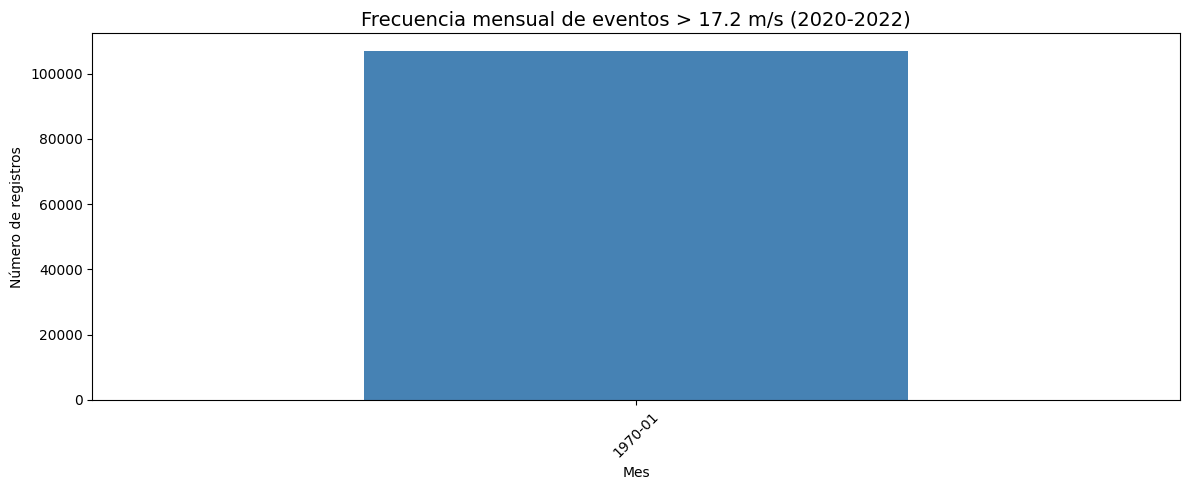

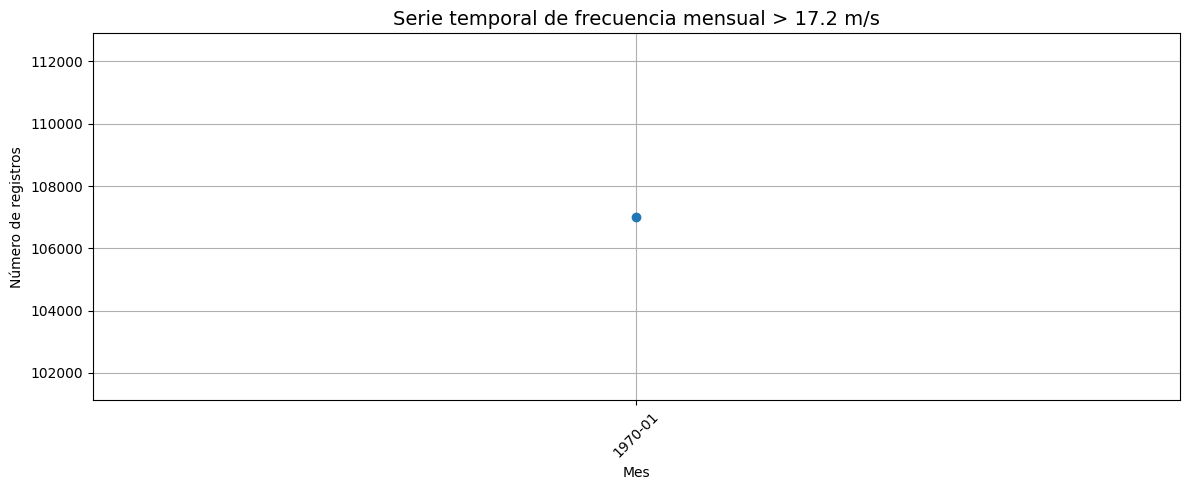

In [16]:
# ==============================
# AN√ÅLISIS FRECUENCIA VIENTO FUERTE ERA5 (COLAB)
# ==============================

# 1Ô∏è‚É£ Instalaci√≥n de dependencias en Colab
!pip install xarray netCDF4 pandas matplotlib

# 2Ô∏è‚É£ Importar librer√≠as
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# 3Ô∏è‚É£ Par√°metros iniciales
umbral_viento = 17.2  # m/s - umbral OMM para vendaval
archivos = [
    "/content/wind_gust_2020.nc",
    "/content/wind_gust_2021.nc",
    "/content/wind_gust_2022.nc"
]

# 4Ô∏è‚É£ Cargar y concatenar datos
ds_list = [xr.open_dataset(a) for a in archivos]
ds = xr.concat(ds_list, dim="time")

# 5Ô∏è‚É£ Revisar variables y unidades
print(ds)

# 6Ô∏è‚É£ Filtrar eventos > umbral
# Variable 'fg10' suele estar en m/s, verificamos
fg10 = ds['fg10']  # r√°fagas de viento a 10m
fg10_eventos = fg10.where(fg10 > umbral_viento)

# 7Ô∏è‚É£ Convertir tiempo a formato datetime
fg10_eventos['time'] = pd.to_datetime(fg10_eventos['time'].values)

# 8Ô∏è‚É£ Calcular frecuencia mensual (n√∫mero de registros por mes que superan el umbral)
eventos_mensuales = fg10_eventos.count(dim=["latitude", "longitude"])  # cuenta puntos por tiempo
df_eventos = eventos_mensuales.to_dataframe(name="conteo").reset_index()

# Agrupar por mes
df_eventos['mes'] = df_eventos['time'].dt.to_period("M")
frecuencia_mensual = df_eventos.groupby('mes')['conteo'].sum()

# 9Ô∏è‚É£ Graficar frecuencia mensual
plt.figure(figsize=(12,5))
frecuencia_mensual.plot(kind='bar', color='steelblue')
plt.title(f"Frecuencia mensual de eventos > {umbral_viento} m/s (2020-2022)", fontsize=14)
plt.ylabel("N√∫mero de registros")
plt.xlabel("Mes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# üîü Graficar serie temporal
plt.figure(figsize=(12,5))
plt.plot(frecuencia_mensual.index.astype(str), frecuencia_mensual.values, marker='o')
plt.title(f"Serie temporal de frecuencia mensual > {umbral_viento} m/s", fontsize=14)
plt.ylabel("N√∫mero de registros")
plt.xlabel("Mes")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
fg10 = ds['fg10']
fg10

<xarray.DataArray 'fg10' (time: 3, valid_time: 26304, latitude: 9, longitude: 13)> Size: 37MB
array([[[[12.427369 , 12.45276  , 12.591432 , ..., 12.798463 ,
          12.409791 , 11.529908 ],
         [12.610963 , 12.575807 , 12.564088 , ..., 13.552369 ,
          13.047486 , 12.366822 ],
         [12.233033 , 12.169557 , 12.076783 , ..., 13.632447 ,
          12.458619 , 11.278932 ],
         ...,
         [ 9.657838 ,  9.318971 ,  8.499635 , ...,  5.224244 ,
           5.85608  ,  5.8463144],
         [ 6.8482676,  6.036744 ,  5.157838 , ...,  4.8375254,
           5.2545176,  6.3101816],
         [ 3.4752207,  2.9381113,  3.2369394, ...,  4.880494 ,
           5.713502 ,  4.9595957]],

        [[12.782012 , 12.85916  , 13.074004 , ..., 12.724395 ,
          12.20291  , 11.347442 ],
         [12.826934 , 12.868926 , 12.976348 , ..., 13.516387 ,
          12.861114 , 11.9304495],
         [12.470489 , 12.480254 , 12.436309 , ..., 13.60916  ,
          12.368926 , 11.009551 ],
...
         [12.434812 , 11.974851 , 12.015866 , ...,  8.520749 ,
          10.006101 ,  8.929929 ],
         [10.82446  , 10.269773 , 10.538327 , ...,  6.6564913,
           7.657468 ,  8.385007 ],
         [ 8.35278  ,  7.98071  ,  8.203366 , ...,  7.211179 ,
           7.803952 ,  7.902585 ]],

        [[13.933371 , 13.616964 , 13.443136 , ..., 12.294699 ,
          12.491964 , 12.403097 ],
         [13.885519 , 13.545675 , 13.235128 , ..., 12.904074 ,
          12.602316 , 12.719503 ],
         [13.784933 , 13.697042 , 13.679464 , ..., 12.889425 ,
          12.425558 , 11.645285 ],
         ...,
         [12.490988 , 12.037863 , 11.844503 , ...,  6.8982143,
           8.861105 ,  8.097433 ],
         [11.136496 , 10.198019 , 10.137472 , ...,  5.5739956,
           6.9138393,  7.8083706],
         [ 8.782003 ,  7.9314175,  8.195089 , ...,  6.3913784,
           7.2038784,  6.803488 ]]]], dtype=float32)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 210kB 2020-01-01 ... 2022-12-31T2...
  * latitude    (latitude) float64 72B 12.5 12.25 12.0 11.75 ... 11.0 10.75 10.5
  * longitude   (longitude) float64 104B -75.5 -75.25 -75.0 ... -72.75 -72.5
    number      int64 8B 0
    expver      (time, valid_time) object 631kB '0001' '0001' ... '0001' '0001'
Dimensions without coordinates: time
Attributes: (12/32)
    GRIB_paramId:                             49
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      117
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            max
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               m s**-1
    long_name:                                Maximum 10 metre wind gust sinc...
    units:                                    m s**-1
    standard_name:                            unknown
    GRIB_surface:                             0.0

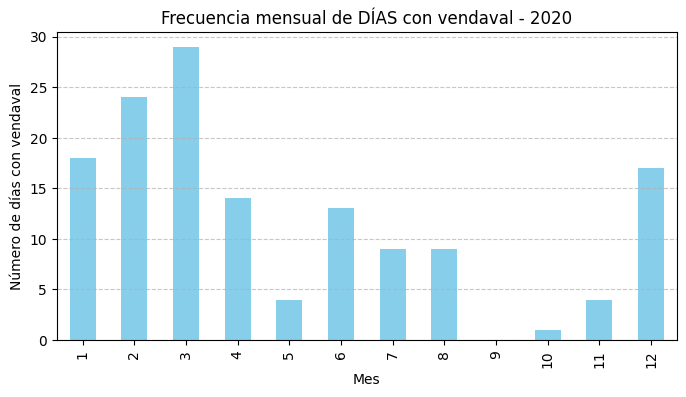

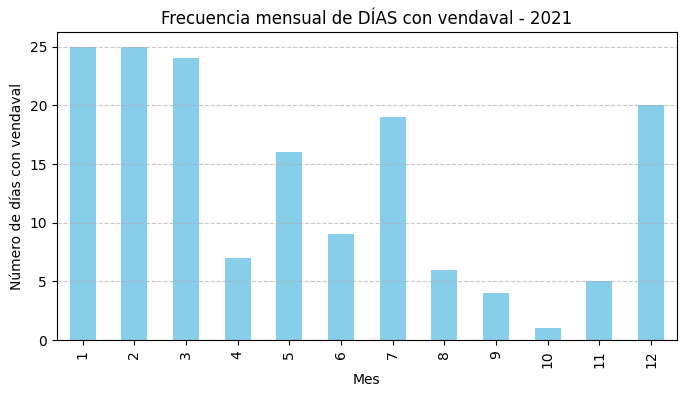

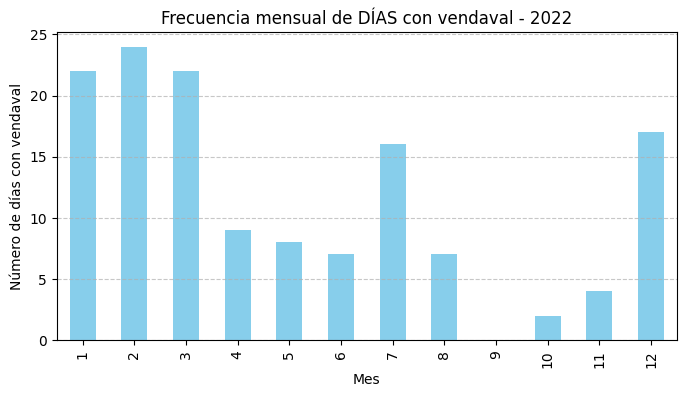

<Figure size 1000x500 with 0 Axes>

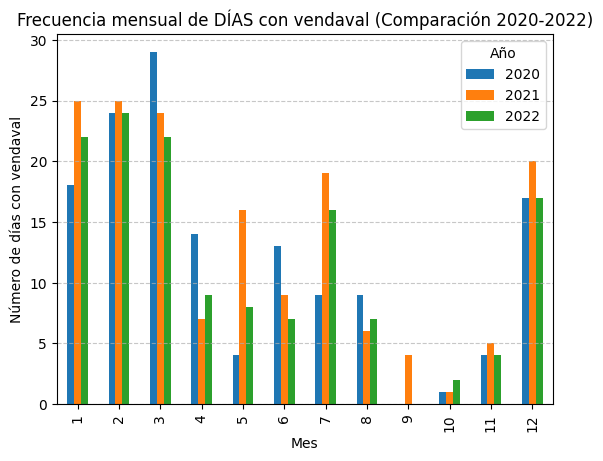

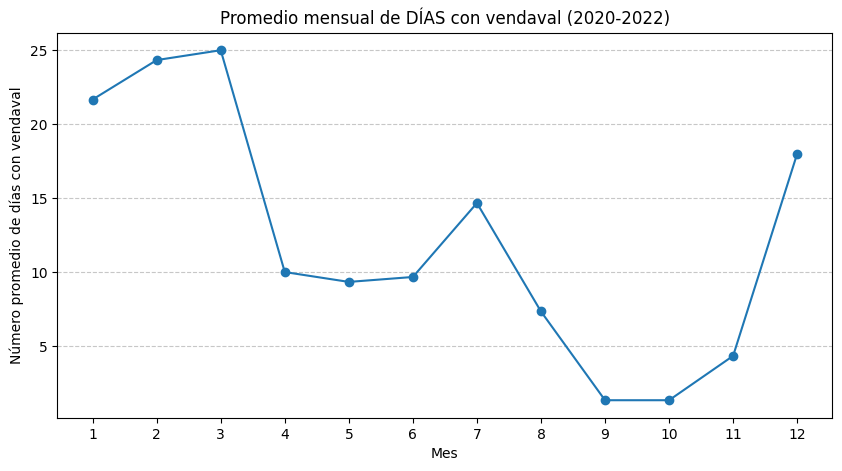

In [23]:
# ===============================================
# An√°lisis de frecuencia mensual de vendavales
# Archivos ERA5 (.nc) - Google Colab
# ===============================================

# 1Ô∏è‚É£ Instalar librer√≠as necesarias
!pip install netCDF4 xarray matplotlib pandas cftime

# 2Ô∏è‚É£ Importar librer√≠as
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# 4Ô∏è‚É£ Definir umbral para considerar vendaval (m/s)
UMBRAL_VENDAVAL = 17.2  # equivalente a 62 km/h

# 5Ô∏è‚É£ Funci√≥n para procesar un archivo y devolver frecuencia mensual de *d√≠as* con vendaval
def procesar_archivo_daily(nombre_archivo):
    ds = xr.open_dataset(nombre_archivo)

    # Ajusta el nombre de la variable si es diferente
    var_name = list(ds.data_vars)[0]

    # Convertir a DataFrame, using 'valid_time' as the time dimension
    df = ds[var_name].to_dataframe().reset_index()

    # Convert 'valid_time' to datetime
    df['valid_time'] = pd.to_datetime(df['valid_time'])

    # Calculate daily maximum gust
    daily_max_gust = df.groupby(df['valid_time'].dt.date)[var_name].max()

    # Count days where the daily maximum exceeds the threshold
    vendaval_days = daily_max_gust[daily_max_gust >= UMBRAL_VENDAVAL]

    # Extract month and count days with vendaval per month
    vendaval_days_monthly_count = vendaval_days.groupby(pd.to_datetime(vendaval_days.index).month).size()

    return vendaval_days_monthly_count

# 6Ô∏è‚É£ Procesar los tres a√±os para obtener el conteo de d√≠as con vendaval
frecuencia_dias_2020 = procesar_archivo_daily('wind_gust_2020.nc')
frecuencia_dias_2021 = procesar_archivo_daily('wind_gust_2021.nc')
frecuencia_dias_2022 = procesar_archivo_daily('wind_gust_2022.nc')


# 7Ô∏è‚É£ Crear DataFrame combinado con el conteo de d√≠as
df_frecuencia_dias = pd.DataFrame({
    '2020': frecuencia_dias_2020,
    '2021': frecuencia_dias_2021,
    '2022': frecuencia_dias_2022
}).fillna(0).astype(int)

# 8Ô∏è‚É£ Graficar cada a√±o individualmente (d√≠as con vendaval)
for year in df_frecuencia_dias.columns:
    plt.figure(figsize=(8,4))
    df_frecuencia_dias[year].plot(kind='bar', color='skyblue')
    plt.title(f"Frecuencia mensual de D√çAS con vendaval - {year}")
    plt.xlabel("Mes")
    plt.ylabel("N√∫mero de d√≠as con vendaval")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# 9Ô∏è‚É£ Graficar comparaci√≥n de a√±os (d√≠as con vendaval)
plt.figure(figsize=(10,5))
df_frecuencia_dias.plot(kind='bar')
plt.title("Frecuencia mensual de D√çAS con vendaval (Comparaci√≥n 2020-2022)")
plt.xlabel("Mes")
plt.ylabel("N√∫mero de d√≠as con vendaval")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="A√±o")
plt.show()

# üîü Graficar promedio mensual de d√≠as con vendaval a lo largo de los a√±os
plt.figure(figsize=(10,5))
df_frecuencia_dias.mean(axis=1).plot(marker='o', linestyle='-')
plt.title("Promedio mensual de D√çAS con vendaval (2020-2022)")
plt.xlabel("Mes")
plt.ylabel("N√∫mero promedio de d√≠as con vendaval")
plt.xticks(range(1, 13))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Estad√≠sticas de la r√°faga m√°xima en d√≠as con vendaval (>17.2 m/s):
  Promedio: 19.36 m/s
  Mediana:  19.03 m/s
  M√°ximo:   24.99 m/s


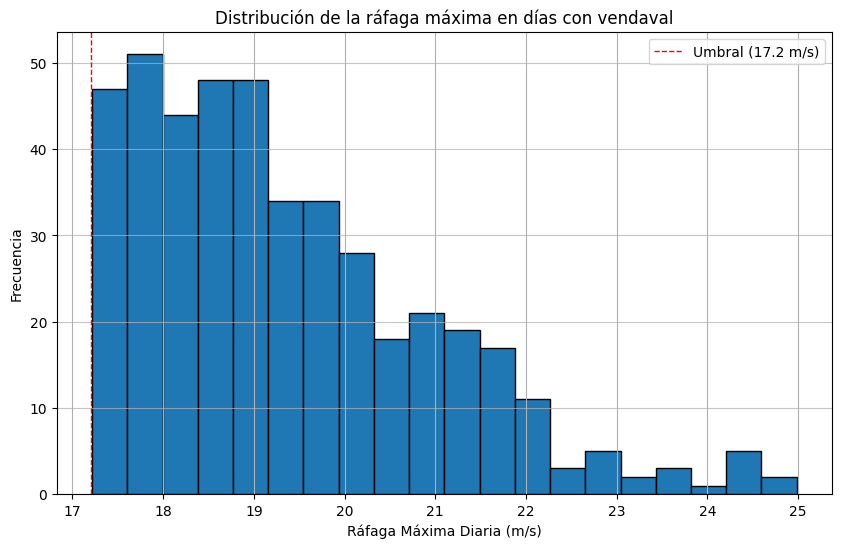

In [24]:
# ===============================================
# An√°lisis de las caracter√≠sticas de los d√≠as con vendavales
# ===============================================

# Reuse the function to get daily maximum gust data
def get_daily_max_gust(nombre_archivo):
    ds = xr.open_dataset(nombre_archivo)
    var_name = list(ds.data_vars)[0]
    df = ds[var_name].to_dataframe().reset_index()
    df['valid_time'] = pd.to_datetime(df['valid_time'])
    daily_max_gust = df.groupby(df['valid_time'].dt.date)[var_name].max()
    return daily_max_gust

# Get daily maximum gust for each year
daily_max_gust_2020 = get_daily_max_gust('wind_gust_2020.nc')
daily_max_gust_2021 = get_daily_max_gust('wind_gust_2021.nc')
daily_max_gust_2022 = get_daily_max_gust('wind_gust_2022.nc')

# Combine daily maximum gust for all years into a single Series
all_daily_max_gust = pd.concat([daily_max_gust_2020, daily_max_gust_2021, daily_max_gust_2022])

# Filter for days where the daily maximum gust exceeds the threshold
UMBRAL_VENDAVAL = 17.2 # m/s
vendaval_days_gust = all_daily_max_gust[all_daily_max_gust >= UMBRAL_VENDAVAL]

# Calculate statistics for gust speed on vendaval days
mean_gust_on_vendaval_days = vendaval_days_gust.mean()
median_gust_on_vendaval_days = vendaval_days_gust.median()
max_gust_on_vendaval_days = vendaval_days_gust.max()

print(f"Estad√≠sticas de la r√°faga m√°xima en d√≠as con vendaval (>{UMBRAL_VENDAVAL} m/s):")
print(f"  Promedio: {mean_gust_on_vendaval_days:.2f} m/s")
print(f"  Mediana:  {median_gust_on_vendaval_days:.2f} m/s")
print(f"  M√°ximo:   {max_gust_on_vendaval_days:.2f} m/s")

# Optional: Plot distribution of maximum gust speeds on vendaval days
plt.figure(figsize=(10, 6))
vendaval_days_gust.hist(bins=20, edgecolor='black')
plt.axvline(UMBRAL_VENDAVAL, color='red', linestyle='dashed', linewidth=1, label=f'Umbral ({UMBRAL_VENDAVAL} m/s)')
plt.title("Distribuci√≥n de la r√°faga m√°xima en d√≠as con vendaval")
plt.xlabel("R√°faga M√°xima Diaria (m/s)")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()